In [15]:
import recordlinkage as rl
from recordlinkage.preprocessing import clean
import os
import pandas as pd
from dataprep.clean import clean_country
from dataprep.clean import clean_text
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [16]:
# load the ground truth from a csv file, transform it in a pandas.Series and compare it with the result
ground_truth = pd.read_csv('gt.csv', header=None)
true_links = pd.MultiIndex.from_frame(ground_truth)
# load the training set from a csv file
training = pd.read_csv('training.csv', encoding = "ISO-8859-1")
df = pd.DataFrame(training)
df = clean_country(df, "country", input_format=("name", "alpha-2"), fuzzy_dist=1, inplace=True)
df.columns = df.columns.str.replace('_clean', '')
for col in df.columns:
    try:
        df[col] = clean(df[col])
    except:
        pass
# load the test set from a csv file
vals1_path = os.path.join('', 'test_set.csv')
vals1 = pd.read_csv(vals1_path, encoding = "ISO-8859-1", index_col=0)
dfA = pd.DataFrame(vals1)
dfA_original = dfA.copy()
dfA = clean_country(dfA, "country", input_format=("name", "alpha-2"), fuzzy_dist=1, inplace=True)
dfA.columns = dfA.columns.str.replace('_clean', '')
for col in dfA.columns:
    if col == "id" or col == "website":
        pass
    dfA[col] = clean(dfA[col])

c:\Users\Valerio\anaconda64\lib\site-packages\dask\dataframe\core.py:6597: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	4698 values cleaned (27.9%)
	235 values unable to be parsed (1.4%), set to NaN
Result contains 16601 (98.6%) values in the correct format and 235 null values (1.4%)


c:\Users\Valerio\anaconda64\lib\site-packages\dask\dataframe\core.py:6597: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	20 values cleaned (54.05%)
Result contains 29 (78.38%) values in the correct format and 8 null values (21.62%)


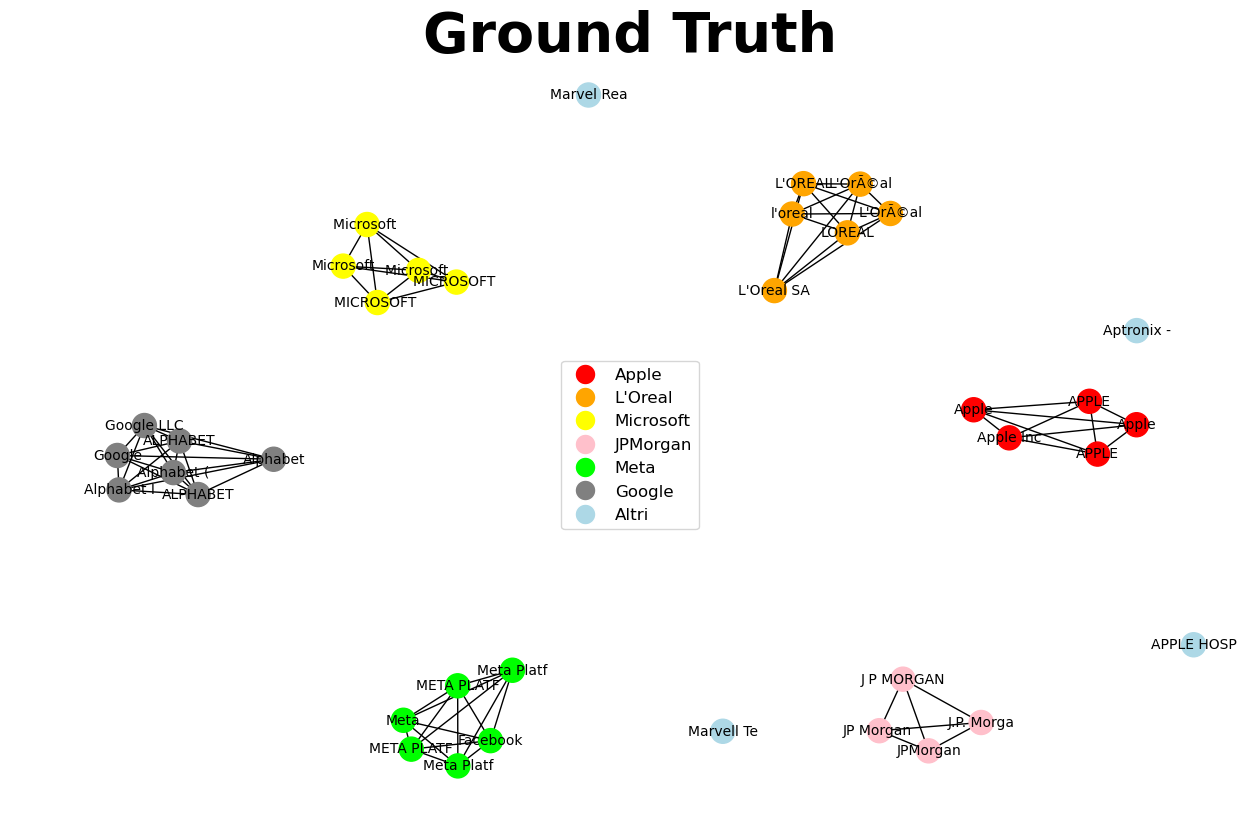

In [17]:
# get key of the dictionary if the value is in the list
def get_color(val, my_dict):
    for key, value in my_dict.items():
         if val in value:
             return key

# get the name of the node from the id
def get_name(val):
    return dfA_original.get("name").loc[val]

# get a list of colors from the dictionary keys bas


# from ground truth list of edges, create a subgraph for each cluster and draw it
nodi_colorati = [0,2,3,4,6,7]
mappa = {
    "red": [0],
    "lime": [2],
    "yellow": [3],
    "gray": [4],
    "pink": [6],
    "orange": [7],
}

legend_elements = [
                   Line2D([0], [0], marker='o', color='w', label='Apple',
                          markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label="L'Oreal",
                          markerfacecolor='orange', markersize=15),
                   Line2D([0], [0], marker='o', color='w', lw=4, label='Microsoft',
                          markerfacecolor='yellow', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='JPMorgan',
                          markerfacecolor='pink', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Meta',
                          markerfacecolor='lime', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Google',
                          markerfacecolor='gray', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Altri',
                          markerfacecolor='lightblue', markersize=15)]

for (x,y) in ground_truth.values:
    if x in nodi_colorati and y in nodi_colorati:
        pass
    elif x in nodi_colorati:
        color = get_color(x, mappa)
        nodi_colorati.append(y)
        mappa[color].append(y)
    elif y in nodi_colorati:
        color = get_color(y, mappa)
        nodi_colorati.append(x)
        mappe[color].append(x)
        
color_list = []
for i in range (0,37):
    if i in nodi_colorati:
        color = get_color(i, mappa)
        color_list.append(color)
    else:
        color_list.append("lightblue")

G = nx.Graph()      
G.clear()
for i in range (0,37):
    G.add_node(i, name=dfA_original.get("name").loc[i][:10]) 
for (x,y) in ground_truth.values:
    G.add_edge(x,y)

names = nx.get_node_attributes(G, 'name')
#pos = nx.spring_layout(G, k=0.3, iterations=30)
pos = {0: ([0.8442522, 0.0984414]), 1: ([0.84453005, 0.35572979]), 2: ([-0.24403878, -0.76528136]), 3: ([-0.45209132,  0.64583087]), 4: ([-0.87275737,  0.01434854]), 5: ([-0.07896522,  1.        ]), 6: ([ 0.41096134, -0.73815364]), 7: ([0.35721411, 0.62311345]), 8: ([0.5698888 , 0.13937058]), 9: ([ 0.14729947, -0.73967966]), 10: ([ 0.4939064 , -0.79320876]), 11: ([-0.39078244, -0.70962654]), 12: ([-0.60935401,  0.00406705]), 13: ([-0.49233026,  0.53217599]), 14: ([0.42956916, 0.67608481]), 15: ([0.76491596, 0.16248262]), 16: ([-0.30142061,  0.48846068]), 17: ([ 0.45076427, -0.59727446]), 18: ([0.28320723, 0.75755861]), 19: ([-0.29941347, -0.61539547]), 20: ([-0.76797244,  0.05398163]), 21: ([0.6298241 , 0.06263211]), 22: ([-0.29907993, -0.83436719]), 23: ([ 0.58248283, -0.71572463]), 24: ([-0.36532496,  0.5206143 ]), 25: ([-0.86986543, -0.0797135 ]), 26: ([-0.82715585,  0.09622255]), 27: ([0.23416098, 0.46520663]), 28: ([-0.20706422, -0.57286036]), 29: ([-0.77831088, -0.03241185]), 30: ([0.37877489, 0.75633064]), 31: ([0.26406223, 0.67452678]), 32: ([0.77845683, 0.01818472]), 33: ([-0.43466561,  0.43262062]), 34: ([-0.7366189 , -0.09251645]), 35: ([-0.37750667, -0.78857195]), 36: ([ 0.94044751, -0.50319853])}
plt.figure(figsize=(16,10))
ax = plt.gca()
ax.set_title('Ground Truth', fontsize=40, fontweight='bold')

ax.legend(handles=legend_elements, loc='center', fontsize=12)

nx.draw(G, pos=pos, node_color=color_list, labels=names, with_labels=True, ax=ax, font_size=10)
#plt.savefig('grafici/ground_truth.png')


In [18]:
# function to calculate the true positive, false positive and false negative
def calculate_tp_fp_fn_tn(ground_truth, result, dataset=dfA):
    tp = 0
    fp = 0
    fn = 0
    tn = rl.full_index_size(dataset)
    for pair1 in result.values:
        found = False
        for pair2 in ground_truth.values:
            if (pair1[0] == pair2[0] and pair1[1] == pair2[1]) or (pair1[0] == pair2[1] and pair1[1] == pair2[0]):
                tp += 1
                found = True
                break
        if not found:
            fp += 1
    for pair1 in ground_truth.values:
        found = False
        for pair2 in result.values:
            if (pair1[0] == pair2[0] and pair1[1] == pair2[1]) or (pair1[0] == pair2[1] and pair1[1] == pair2[0]):
                found = True
                break
        if not found:
            fn += 1
    tn = tn - tp/2 - fp/2 - fn/2
    return tp/2, fp/2, fn/2, tn

# function to calculate the precision, recall, f1 score, accuracy and specificity
def calculate_metrics(tp, fp, fn, tn):
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    try:
        f1 = 2*precision*recall/(precision+recall)
    except ZeroDivisionError:
        f1 = 0
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    specificity = tn/(tn+fp)
    return precision, recall, f1, accuracy, specificity

def get_false_negative(ground_truth, result):
    false_negative = []
    for pair1 in ground_truth.values:
        found = False
        for pair2 in result.values:
            if (pair1[0] == pair2[0] and pair1[1] == pair2[1]) or (pair1[0] == pair2[1] and pair1[1] == pair2[0]):
                found = True
                break
        if not found:
            false_negative.append(pair1)
    return false_negative

def get_false_positive(ground_truth, result):
    false_positive = []
    for pair1 in result.values:
        found = False
        for pair2 in ground_truth.values:
            if (pair1[0] == pair2[0] and pair1[1] == pair2[1]) or (pair1[0] == pair2[1] and pair1[1] == pair2[0]):
                found = True
                break
        if not found:
            false_positive.append(pair1)
    return false_positive


In [19]:
# Indexation step
# Create a blocking index
indexer = rl.Index()
indexer.block(on="name")
# Create a neighbourhood index
indexer.sortedneighbourhood(on="name", window=5)
candidate_links = indexer.index(dfA, dfA)
candidate_links = candidate_links.drop_duplicates(keep="first")

candidate_links = indexer.index(dfA, dfA)
for (x,y) in candidate_links.values:
    if x == y:
        candidate_links = candidate_links.drop((x,y))
        
# Comparison step
compare_cl = rl.Compare()
# Jarowinkler similarity score is calculated by giving more importance to the beginning of the string. 
# The Levenshtein similarity score is calculated and provides higher importance based on the order of the character.
compare_cl.string("name","name", method="jarowinkler", threshold=0.7, label="name")
compare_cl.string("headquarter","headquarter", method="levenshtein", threshold=0.6, label="headquarter")
compare_cl.exact("country","country", label="country")
compare_cl.string("ceo","ceo", method="levenshtein", threshold=0.6, label="ceo")
compare_cl.string("business","business", method="jaro", threshold=0.6, label="business")

features = compare_cl.compute(candidate_links, dfA)

In [20]:
# Indexation step
# Create a blocking index
indexer = rl.Index()
indexer.block(on="name")
# Create a neighbourhood index
indexer.sortedneighbourhood(on="name", window=5)
candidate_links = indexer.index(df, df)
candidate_links = candidate_links.drop_duplicates(keep="first")
candidate_links = indexer.index(df, df)

features2 = compare_cl.compute(candidate_links, df)

TruePositives:  50.0 FalsePositives:  9.0 TrueNegatives:  580.0 FalseNegatives:  27.0
Precision:  0.847457627118644 Recall:  0.6493506493506493 F1:  0.7352941176470589 Accuracy:  0.9459459459459459 Specificity:  0.9847198641765704


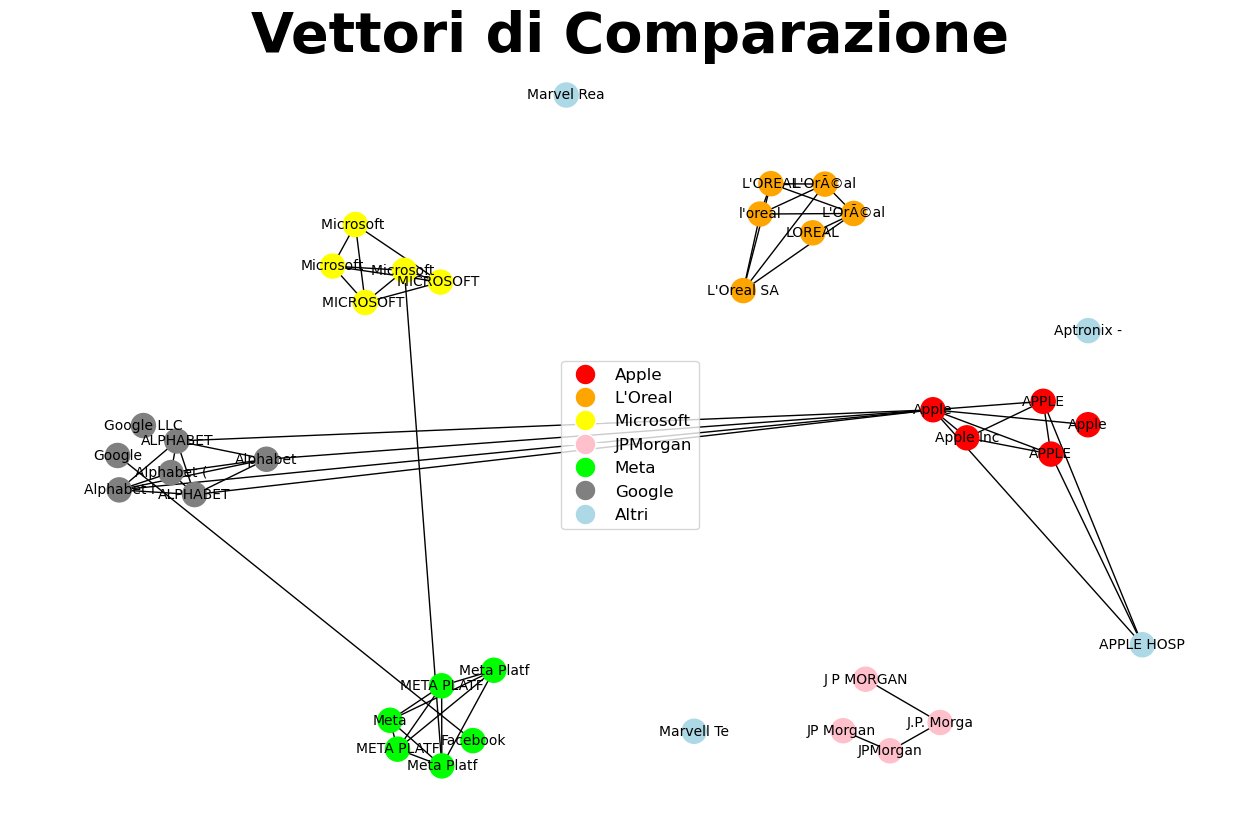

In [21]:
# Classification step
predict_links = features[features.sum(axis=1) > 1]

# get the record pairs from the original data
predict_links.index.names = ['id_1', 'id_2']
predict_links.reset_index(inplace=True)

for col in dfA.columns:
    try:
        predict_links = predict_links.drop([col], axis=1)
    except:
        pass
    
predict_links = pd.MultiIndex.from_frame(predict_links)
tp, fp, fn, tn = calculate_tp_fp_fn_tn(true_links, predict_links, dfA)
precision, recall, f1, accuracy, specificity = calculate_metrics(tp, fp, fn, tn)

print("TruePositives: ", tp, "FalsePositives: ", fp, "TrueNegatives: ", tn, "FalseNegatives: ", fn)
print("Precision: ", precision, "Recall: ", recall, "F1: ", f1, "Accuracy: ", accuracy, "Specificity: ", specificity)

#print("False negative:",get_false_negative(true_links, predict_links))
#print("False positive:",get_false_positive(true_links, predict_links))

G.clear()
G.remove_edges_from(G.edges)
for i in range (0,37):
    G.add_node(i, name=dfA_original.get("name").loc[i][:10])
for (x,y) in predict_links.values:
    G.add_edge(x,y)
    
names = nx.get_node_attributes(G, 'name')

plt.figure(figsize=(16,10))
ax = plt.gca()
ax.set_title('Vettori di Comparazione', fontsize=40, fontweight='bold')

ax.legend(handles=legend_elements, loc='center', fontsize=12)

nx.draw(G, pos=pos, node_color=color_list, labels=names, with_labels=True, ax=ax, font_size=10)
#plt.savefig('grafici/vettori_comp.png')


ECM algorithm converged after 63 iterations


TruePositives:  46.0 FalsePositives:  5.0 TrueNegatives:  584.0 FalseNegatives:  31.0
Precision:  0.9019607843137255 Recall:  0.5974025974025974 F1:  0.7187500000000001 Accuracy:  0.9459459459459459 Specificity:  0.9915110356536503


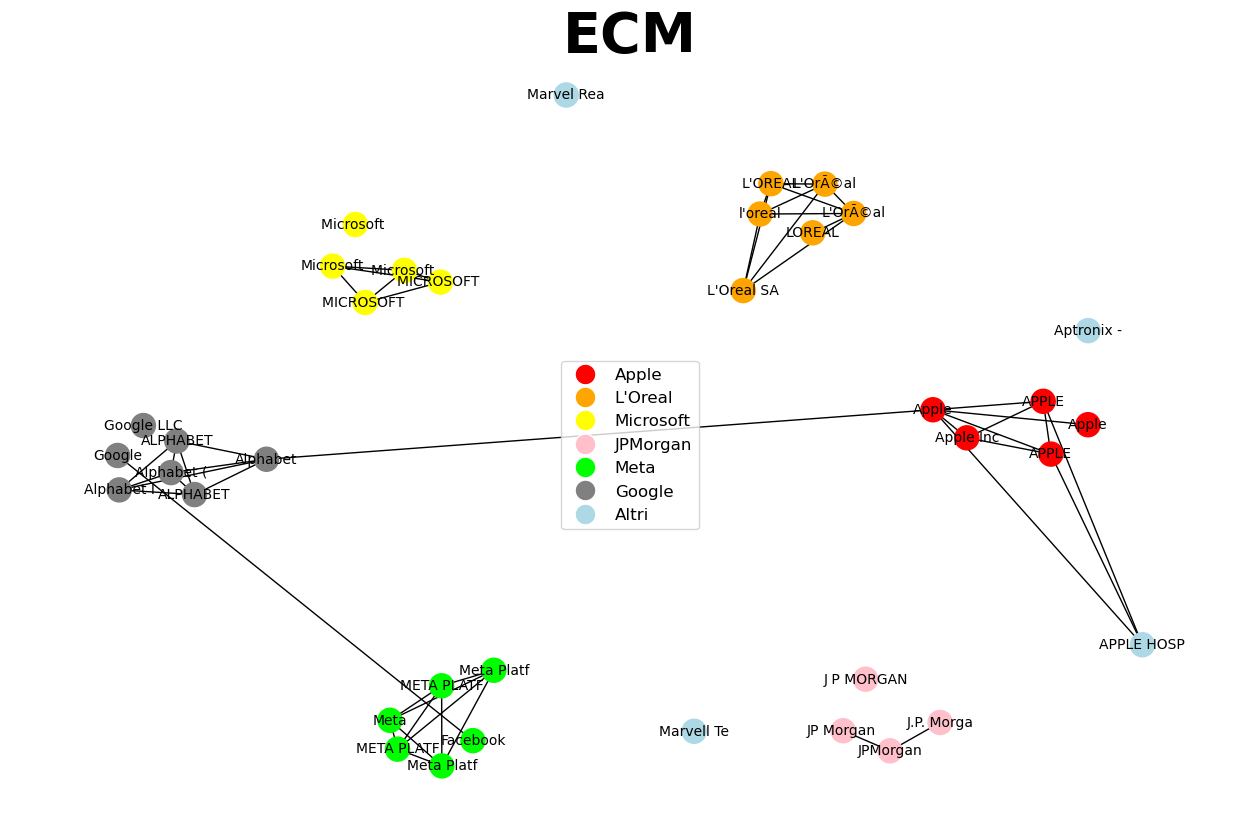

In [22]:
cl = rl.ECMClassifier(max_iter=1000, atol=0.0000001)
cl.fit(features2)
predict_links = cl.predict(features)


tp, fp, fn, tn = calculate_tp_fp_fn_tn(true_links, predict_links, dfA)
precision, recall, f1, accuracy, specificity = calculate_metrics(tp, fp, fn, tn)

print("TruePositives: ", tp, "FalsePositives: ", fp, "TrueNegatives: ", tn, "FalseNegatives: ", fn)
print("Precision: ", precision, "Recall: ", recall, "F1: ", f1, "Accuracy: ", accuracy, "Specificity: ", specificity)

#print("False negative:",get_false_negative(true_links, predict_links))
#print("False positive:",get_false_positive(true_links, predict_links))

G.clear()
G.remove_edges_from(G.edges)
for i in range (0,37):
    G.add_node(i, name=dfA_original.get("name").loc[i][:10])
for (x,y) in predict_links.values:
    G.add_edge(x,y)
names = nx.get_node_attributes(G, 'name')

plt.figure(figsize=(16,10))
ax = plt.gca()
ax.set_title('ECM', fontsize=40, fontweight='bold')

ax.legend(handles=legend_elements, loc='center', fontsize=12)

nx.draw(G, pos=pos, node_color=color_list, labels=names, with_labels=True, ax=ax, font_size=10)
#plt.savefig('grafici/ecm.png')

TruePositives:  47.0 FalsePositives:  7.0 TrueNegatives:  582.0 FalseNegatives:  30.0
Precision:  0.8703703703703703 Recall:  0.6103896103896104 F1:  0.7175572519083969 Accuracy:  0.9444444444444444 Specificity:  0.9881154499151104


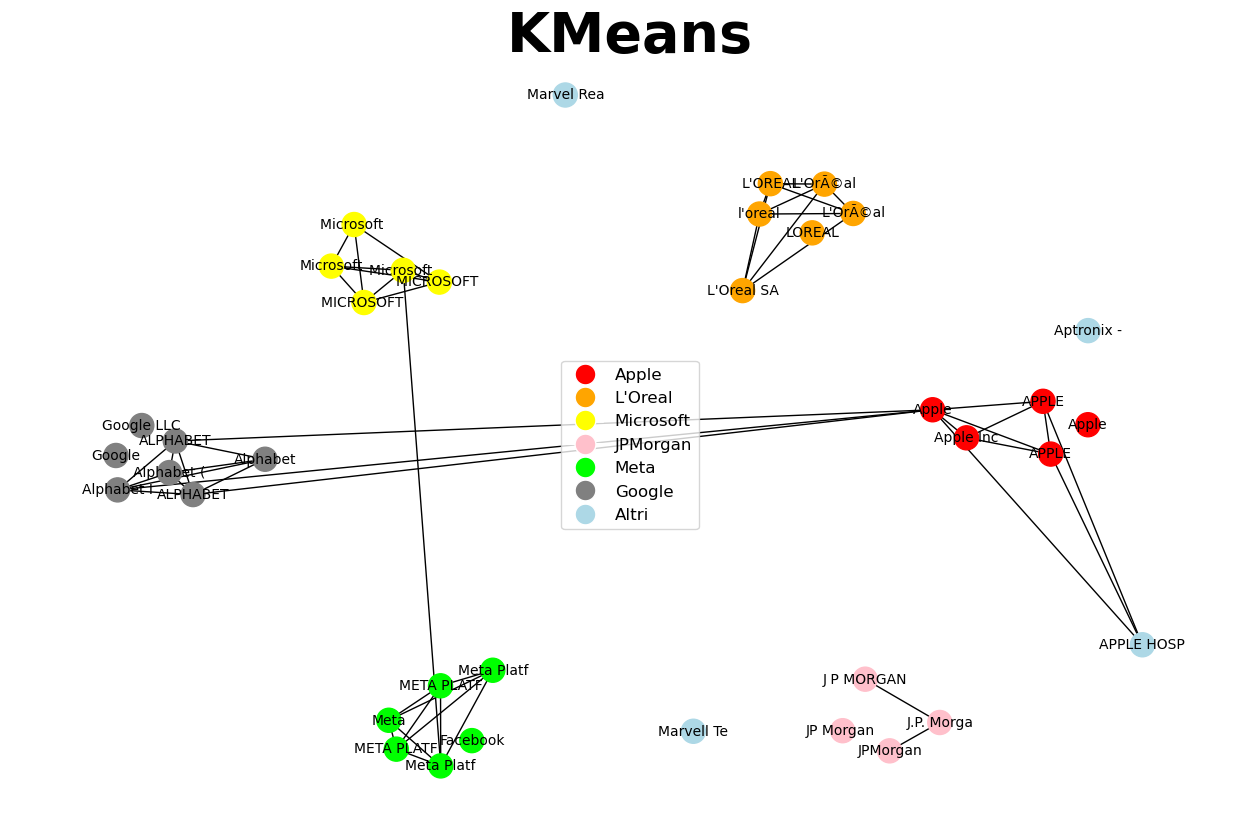

In [23]:
cl = rl.KMeansClassifier()
cl.fit(features2)
predict_links = cl.predict(features)

tp, fp, fn, tn = calculate_tp_fp_fn_tn(true_links, predict_links, dfA)
precision, recall, f1, accuracy, specificity = calculate_metrics(tp, fp, fn, tn)

print("TruePositives: ", tp, "FalsePositives: ", fp, "TrueNegatives: ", tn, "FalseNegatives: ", fn)
print("Precision: ", precision, "Recall: ", recall, "F1: ", f1, "Accuracy: ", accuracy, "Specificity: ", specificity)

G.clear()
for i in range (0,37):
    G.add_node(i, name=dfA_original.get("name").loc[i][:10])
for (x,y) in predict_links.values:
    G.add_edge(x,y)
    
names = nx.get_node_attributes(G, 'name')

plt.figure(figsize=(16,10))
ax = plt.gca()
ax.set_title('KMeans', fontsize=40, fontweight='bold')

ax.legend(handles=legend_elements, loc='center', fontsize=12)

nx.draw(G, pos=pos, node_color=color_list, labels=names, with_labels=True, ax=ax, font_size=10)
#plt.savefig('grafici/kmeans.png')

TruePositives:  60.0 FalsePositives:  4.0 TrueNegatives:  585.0 FalseNegatives:  17.0
Precision:  0.9375 Recall:  0.7792207792207793 F1:  0.851063829787234 Accuracy:  0.9684684684684685 Specificity:  0.9932088285229203


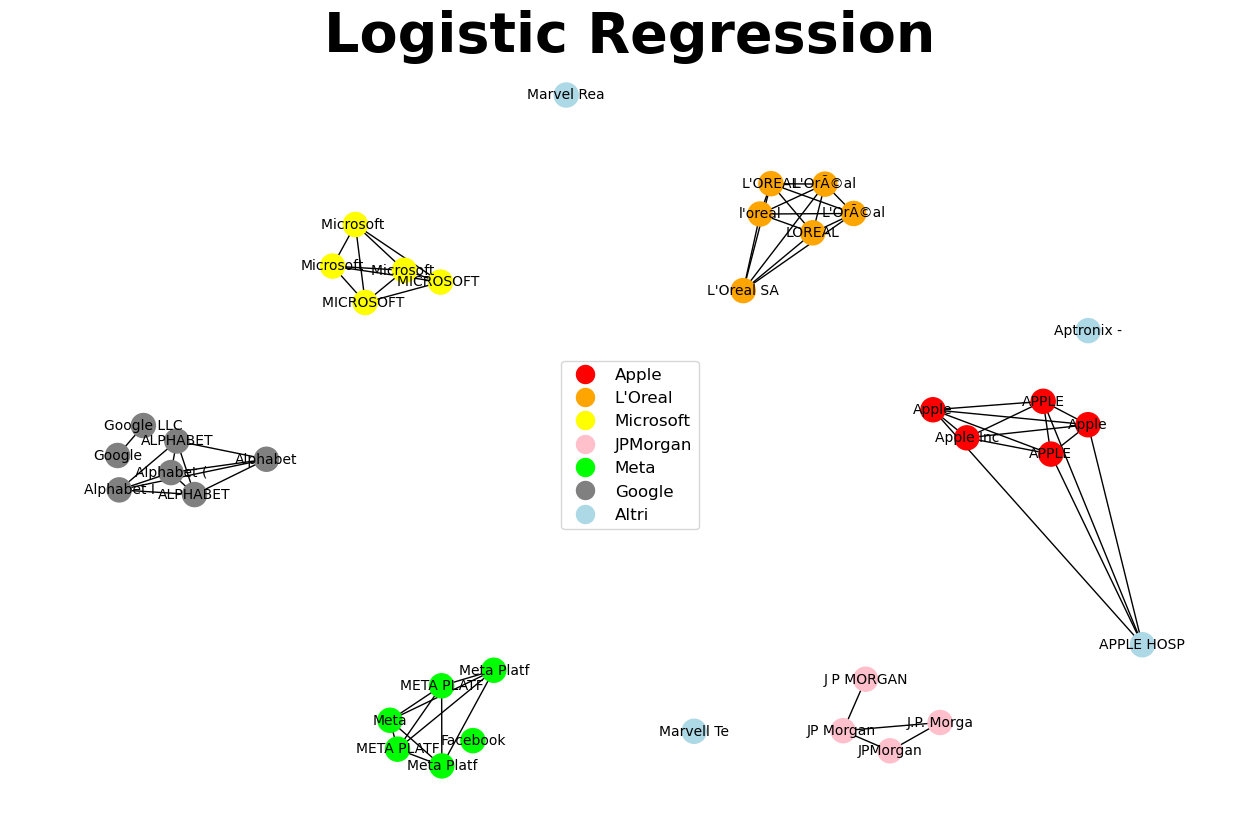

In [24]:
intercept = -7.0
coefficients = [10, 4, 2, 2, 4, 3]

logreg = rl.LogisticRegressionClassifier(intercept=intercept, coefficients=coefficients)
logreg.fit(features, true_links)
predict_links = logreg.predict(features)

tp, fp, fn, tn = calculate_tp_fp_fn_tn(true_links, predict_links, dfA)
precision, recall, f1, accuracy, specificity = calculate_metrics(tp, fp, fn, tn)

print("TruePositives: ", tp, "FalsePositives: ", fp, "TrueNegatives: ", tn, "FalseNegatives: ", fn)
print("Precision: ", precision, "Recall: ", recall, "F1: ", f1, "Accuracy: ", accuracy, "Specificity: ", specificity)

G.clear()
for i in range (0,37):
    G.add_node(i, name=dfA_original.get("name").loc[i][:10])
for (x,y) in predict_links.values:
    G.add_edge(x,y)
    
names = nx.get_node_attributes(G, 'name')

plt.figure(figsize=(16,10))
ax = plt.gca()
ax.set_title('Logistic Regression', fontsize=40, fontweight='bold')

ax.legend(handles=legend_elements, loc='center', fontsize=12)

nx.draw(G, pos, node_color=color_list, labels=names, with_labels=True, ax=ax, font_size=10)
#plt.savefig('grafici/logreg.png')

TruePositives:  60.0 FalsePositives:  4.0 TrueNegatives:  585.0 FalseNegatives:  17.0
Precision:  0.9375 Recall:  0.7792207792207793 F1:  0.851063829787234 Accuracy:  0.9684684684684685 Specificity:  0.9932088285229203


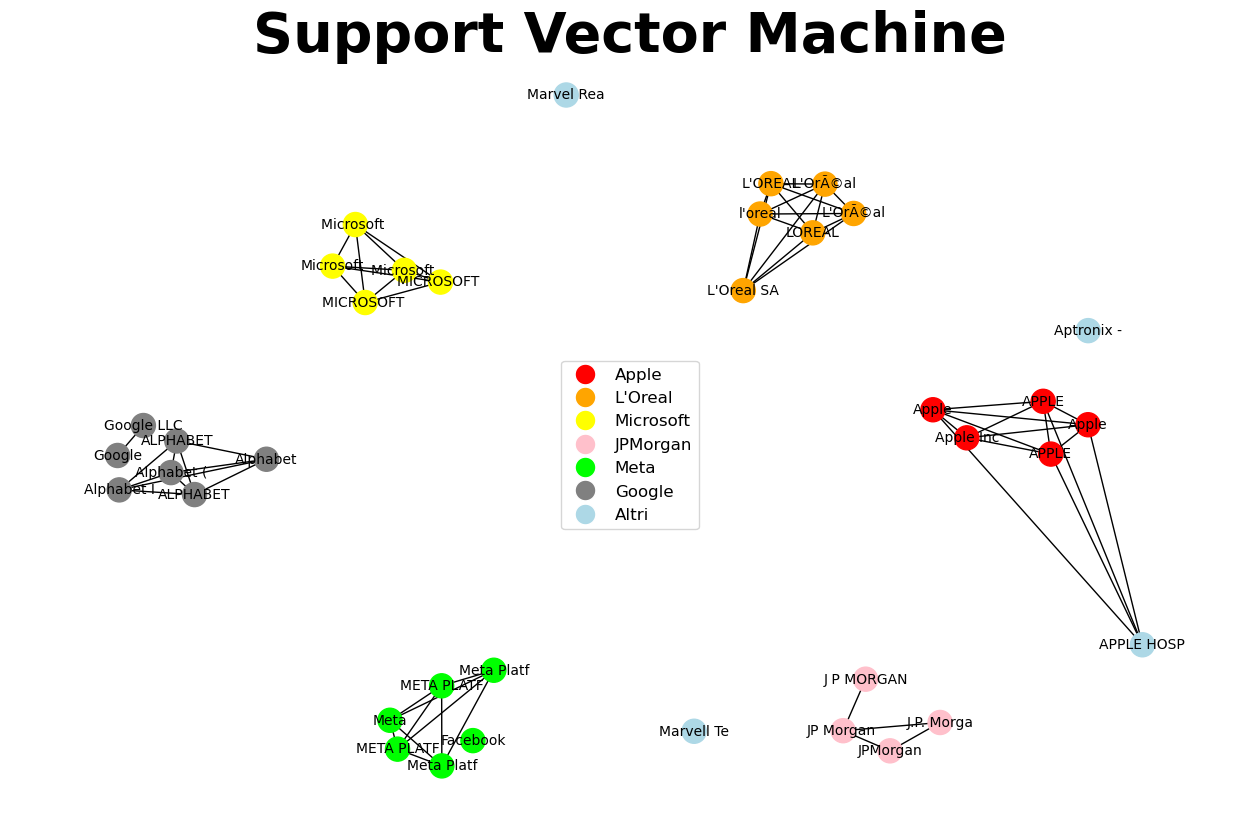

In [25]:
svmc = rl.SVMClassifier()
svmc.fit(features, true_links)
predict_links = svmc.predict(features)

tp, fp, fn, tn = calculate_tp_fp_fn_tn(true_links, predict_links, dfA)
precision, recall, f1, accuracy, specificity = calculate_metrics(tp, fp, fn, tn)

print("TruePositives: ", tp, "FalsePositives: ", fp, "TrueNegatives: ", tn, "FalseNegatives: ", fn)
print("Precision: ", precision, "Recall: ", recall, "F1: ", f1, "Accuracy: ", accuracy, "Specificity: ", specificity)


G.clear()
for i in range (0,37):
    G.add_node(i, name=dfA_original.get("name").loc[i][:10])
for (x,y) in predict_links.values:
    G.add_edge(x,y)
    
names = nx.get_node_attributes(G, 'name')

plt.figure(figsize=(16,10))
ax = plt.gca()
ax.set_title('Support Vector Machine', fontsize=40, fontweight='bold')

ax.legend(handles=legend_elements, loc='center', fontsize=12)

nx.draw(G, pos, node_color=color_list, labels=names, with_labels=True, ax=ax, font_size=10)
#plt.savefig('grafici/svm.png')

TruePositives:  60.0 FalsePositives:  4.0 TrueNegatives:  585.0 FalseNegatives:  17.0
Precision:  0.9375 Recall:  0.7792207792207793 F1:  0.851063829787234 Accuracy:  0.9684684684684685 Specificity:  0.9932088285229203


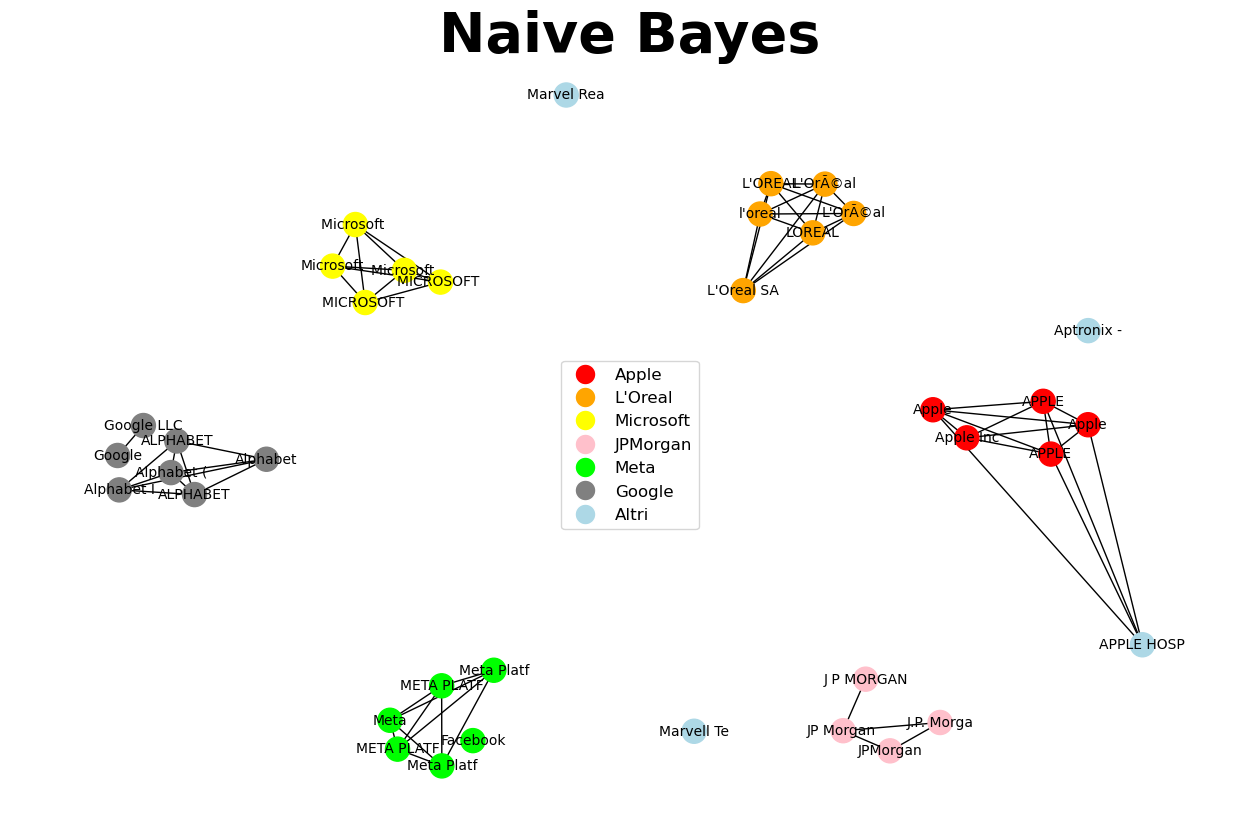

In [26]:
# Initialise the NaiveBayesClassifier.
cl = rl.NaiveBayesClassifier()
cl.fit(features, true_links)
predict_links = cl.predict(features)

tp, fp, fn, tn = calculate_tp_fp_fn_tn(true_links, predict_links, dfA)
precision, recall, f1, accuracy, specificity = calculate_metrics(tp, fp, fn, tn)

print("TruePositives: ", tp, "FalsePositives: ", fp, "TrueNegatives: ", tn, "FalseNegatives: ", fn)
print("Precision: ", precision, "Recall: ", recall, "F1: ", f1, "Accuracy: ", accuracy, "Specificity: ", specificity)

G.clear()
for i in range (0,37):
    G.add_node(i, name=dfA_original.get("name").loc[i][:10])
for (x,y) in predict_links.values:
    G.add_edge(x,y)
    
names = nx.get_node_attributes(G, 'name')

plt.figure(figsize=(16,10))
ax = plt.gca()
ax.set_title('Naive Bayes', fontsize=40, fontweight='bold')

ax.legend(handles=legend_elements, loc='center', fontsize=12)

nx.draw(G, pos, node_color=color_list, labels=names, with_labels=True, ax=ax, font_size=10)
#plt.savefig('grafici/bayes.png')